In [1]:
import praw
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from datetime import timedelta

In [12]:
# Reddit API credentials
reddit = praw.Reddit(client_id='-9J-zura67FGj8nc-8d0nQ', 
                     client_secret='485kQfBmWu4JjnqAjH5LP20pI8xMZw', 
                     user_agent='Tanneru Sudheer')

# List of subreddits to target
subreddits = ['politics', 'election2024', 'PoliticalDiscussion', 'conservative', 'democrats', 'republicans']

# Set up an empty list to store the data
posts_data = []

# Function to convert timestamp
def get_date(created):
    return datetime.datetime.fromtimestamp(created)

# Define a search query related to US elections
query = 'US election'

# Define parties to track
parties = ['democrats', 'republicans', 'independents', 'libertarian', 'green']

# Function to check for party mentions in text
def check_party_support(text):
    party_count = {party: 0 for party in parties}  # Initialize counts for each party
    for party in parties:
        if party.lower() in text.lower():  # Check for case-insensitive mentions of each party
            party_count[party] += 1
    return party_count

# Collect posts from multiple subreddits
for subreddit in subreddits:
    subreddit_instance = reddit.subreddit(subreddit)
    
    # Fetch posts using the search query
    for submission in subreddit_instance.search(query, limit=None):
        if len(posts_data) >= 1000:  # Stop once we've collected 1000 records
            break
        post_data = [submission.title, submission.score, submission.id, 
                     submission.url, submission.num_comments, submission.selftext, 
                     get_date(submission.created), subreddit]
        
        # Get party support count from title and body
        party_count = check_party_support(submission.title + " " + submission.selftext)
        post_data.extend(party_count.values())  # Add counts to the post data
        
        posts_data.append(post_data)

# Convert list into a DataFrame
columns = ['Title', 'Score', 'ID', 'URL', 'Num_Comments', 'Body', 'Created', 'Subreddit'] + parties
posts_df = pd.DataFrame(posts_data, columns=columns)

# Drop duplicates if any
posts_df.drop_duplicates(subset=['ID'], inplace=True)

# Ensure we have 1000 records
if len(posts_df) < 1000:
    print(f"Warning: Only {len(posts_df)} posts were collected. Try adjusting the search query or adding more subreddits.")
else:
    print(f"Successfully collected {len(posts_df)} posts.")

# Save the data to a CSV file
posts_df.to_csv('reddit_us_election_data_with_parties.csv', index=False)

# Print out the first few records
print(posts_df.head())

                                               Title  Score       ID  \
0  Kamala Harris will win US election, Telegraph ...   8749  1f84g7u   
1  /r/Politics' 2024 US Elections Live Thread, Pa...   5235  1gkm4g5   
2  Trump not entitled to immunity for efforts to ...  40220  1fv5526   
3  /r/Politics' 2024 US Elections Live Thread, Pa...   5078  1gkpa96   
4  Why isn't Election Day a national holiday in t...   9188  1gk94vn   

                                                 URL  Num_Comments Body  \
0  https://www.telegraph.co.uk/us/politics/2024/0...          1036        
1         https://www.reddit.com/live/1db9knzhqzdfp/         60045        
2  https://www.france24.com/en/americas/20241003-...          1135        
3         https://www.reddit.com/live/1db9knzhqzdfp/         82151        
4  https://www.kgw.com/article/news/nation-world/...           779        

              Created Subreddit  democrats  republicans  independents  \
0 2024-09-03 12:34:06  politics          0 

In [13]:
# Load the data
df = pd.read_csv('reddit_us_election_data_with_parties.csv')

In [14]:
# Display the first few rows of the dataframe
df.head()

,Title,Score,ID,URL,Num_Comments,Body,Created,Subreddit,democrats,republicans,independents,libertarian,green
0,"Kamala Harris will win US election, Telegraph ...",8749,1f84g7u,https://www.telegraph.co.uk/us/politics/2024/0...,1036,NaN,2024-09-03 12:34:06,politics,0,0,0,0,0
1,"/r/Politics' 2024 US Elections Live Thread, Pa...",5235,1gkm4g5,https://www.reddit.com/live/1db9knzhqzdfp/,60045,NaN,2024-11-05 19:41:41,politics,0,0,0,0,0
2,Trump not entitled to immunity for efforts to ...,40220,1fv5526,https://www.france24.com/en/americas/20241003-...,1135,NaN,2024-10-03 07:09:39,politics,0,0,0,0,0
3,"/r/Politics' 2024 US Elections Live Thread, Pa...",5078,1gkpa96,https://www.reddit.com/live/1db9knzhqzdfp/,82151,NaN,2024-11-05 22:33:33,politics,0,0,0,0,0
4,Why isn't Election Day a national holiday in t...,9188,1gk94vn,https://www.kgw.com/article/news/nation-world/...,779,NaN,2024-11-05 10:21:48,politics,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         955 non-null    object
 1   Score         955 non-null    int64 
 2   ID            955 non-null    object
 3   URL           955 non-null    object
 4   Num_Comments  955 non-null    int64 
 5   Body          346 non-null    object
 6   Created       955 non-null    object
 7   Subreddit     955 non-null    object
 8   democrats     955 non-null    int64 
 9   republicans   955 non-null    int64 
 10  independents  955 non-null    int64 
 11  libertarian   955 non-null    int64 
 12  green         955 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 97.1+ KB


In [16]:
df.describe()

,Score,Num_Comments,democrats,republicans,independents,libertarian,green
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,3106.690052,1445.760209,0.094241,0.078534,0.010471,0.010471,0.014660
std,11619.052709,6000.526289,0.292317,0.269151,0.101845,0.101845,0.120249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,180.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1051.500000,579.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,214315.000000,82151.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.isnull().sum()

Title             0
Score             0
ID                0
URL               0
Num_Comments      0
Body            609
Created           0
Subreddit         0
democrats         0
republicans       0
independents      0
libertarian       0
green             0
dtype: int64

In [18]:
# Drop rows with missing values (if needed)
df.dropna(inplace=True)

# If necessary, drop any columns that are not useful
# df.drop(columns=['UnnecessaryColumn'], inplace=True)

# Convert 'Created' column to datetime if it's not already
df['Created'] = pd.to_datetime(df['Created'])

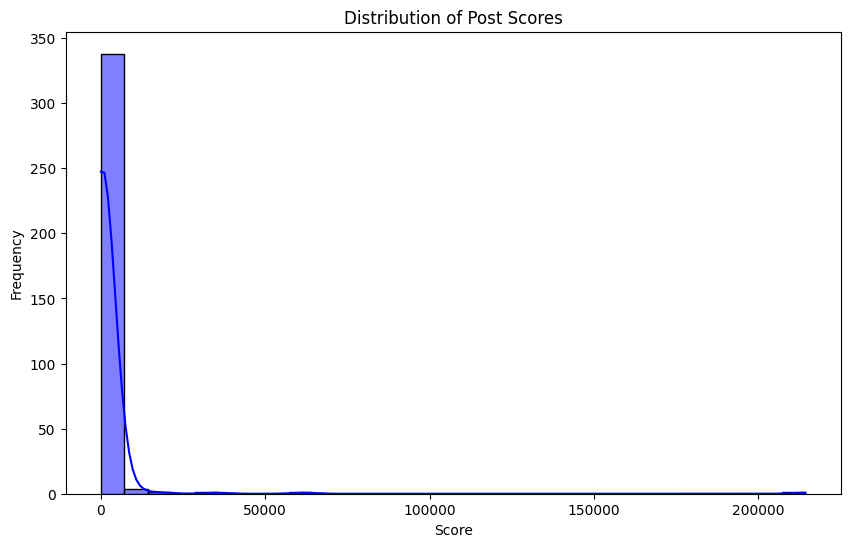

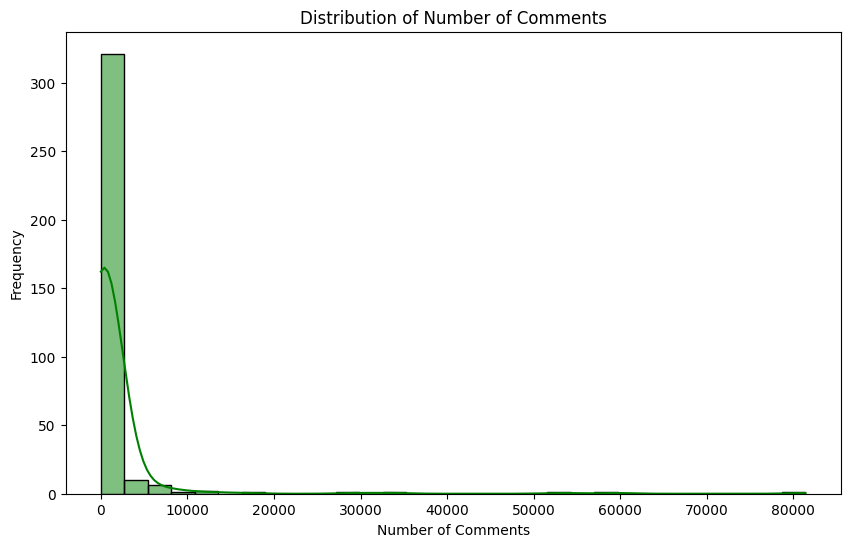

In [19]:
# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of number of comments
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_Comments'], bins=30, kde=True, color='green')
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3066275473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_support.index, y=party_support.values, palette='viridis')


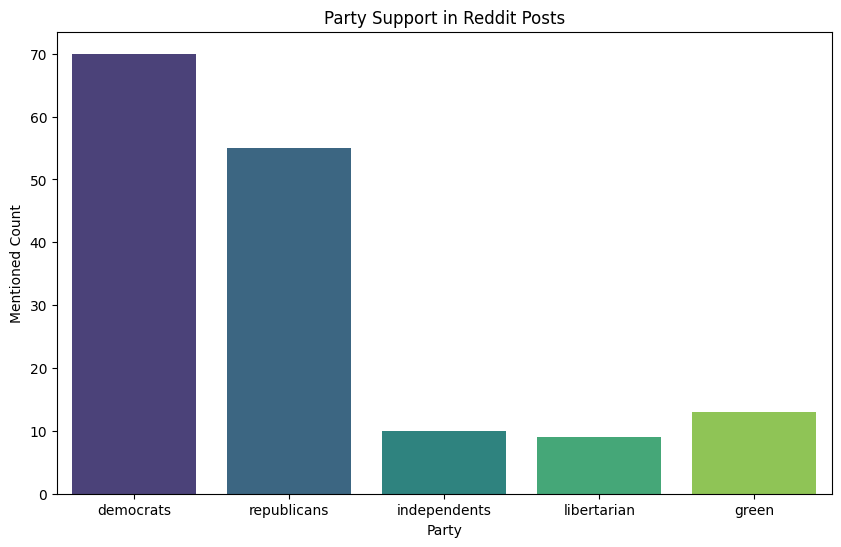

In [21]:
# Sum the counts of party support across all rows
party_columns = ['democrats', 'republicans', 'independents', 'libertarian', 'green']
party_support = df[party_columns].sum()

# Create a bar plot to visualize party support
plt.figure(figsize=(10, 6))
sns.barplot(x=party_support.index, y=party_support.values, palette='viridis')
plt.title('Party Support in Reddit Posts')
plt.xlabel('Party')
plt.ylabel('Mentioned Count')
plt.show()

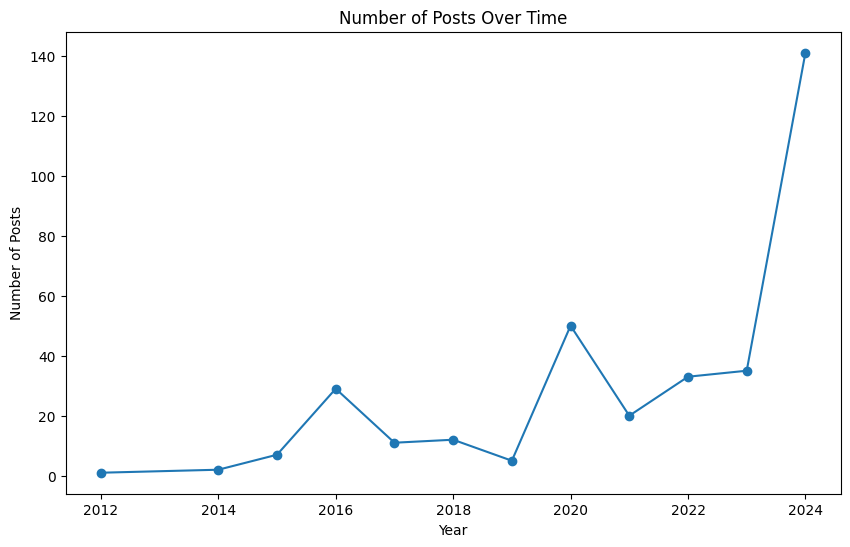

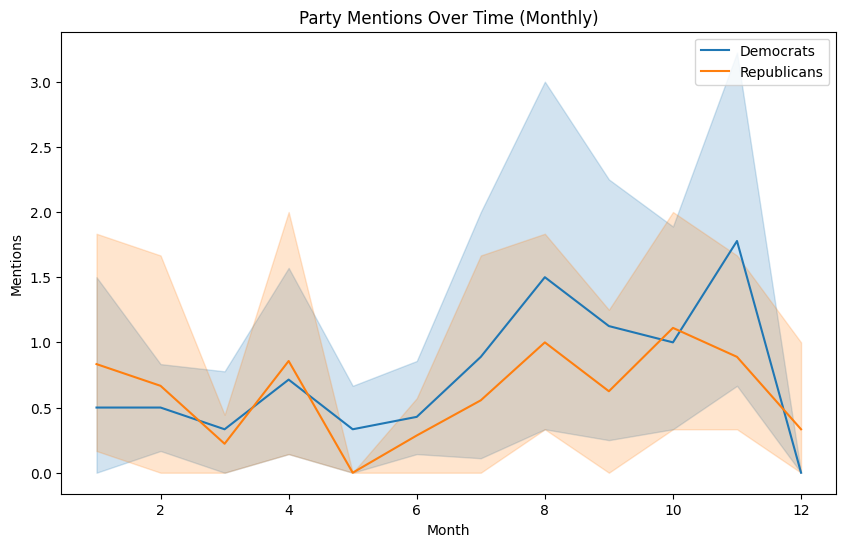

In [22]:
# Extract date information (can also extract year, month, etc.)
df['Year'] = df['Created'].dt.year
df['Month'] = df['Created'].dt.month

# Plot the number of posts over time
plt.figure(figsize=(10, 6))
df.groupby('Year')['ID'].count().plot(kind='line', marker='o')
plt.title('Number of Posts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.show()

# Plot the number of party mentions over time
party_trends = df.groupby(['Year', 'Month'])[party_columns].sum()
party_trends = party_trends.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=party_trends, x='Month', y='democrats', label='Democrats')
sns.lineplot(data=party_trends, x='Month', y='republicans', label='Republicans')
plt.title('Party Mentions Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Mentions')
plt.legend()
plt.show()

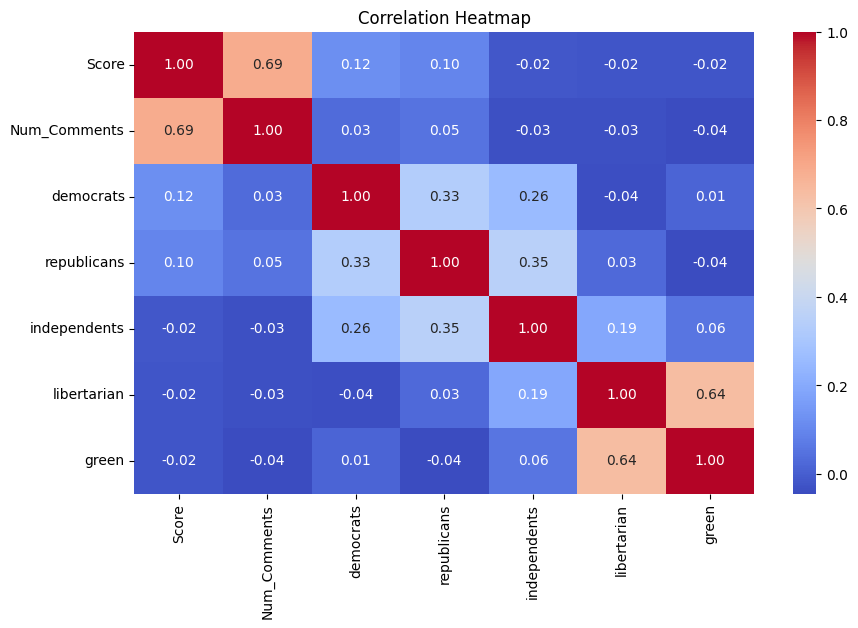

In [23]:
# Compute the correlation matrix for numerical columns
corr = df[['Score', 'Num_Comments'] + party_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\809456451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='Set2')


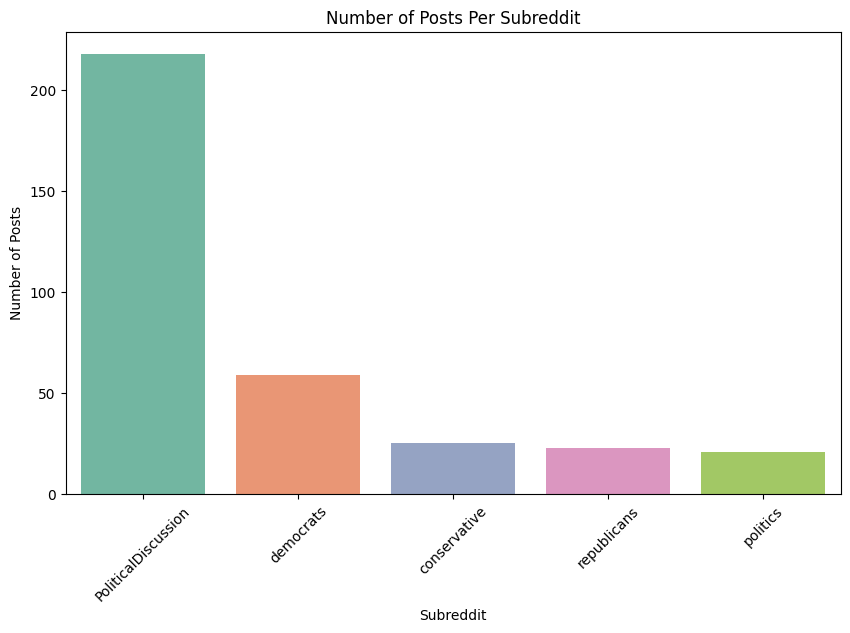

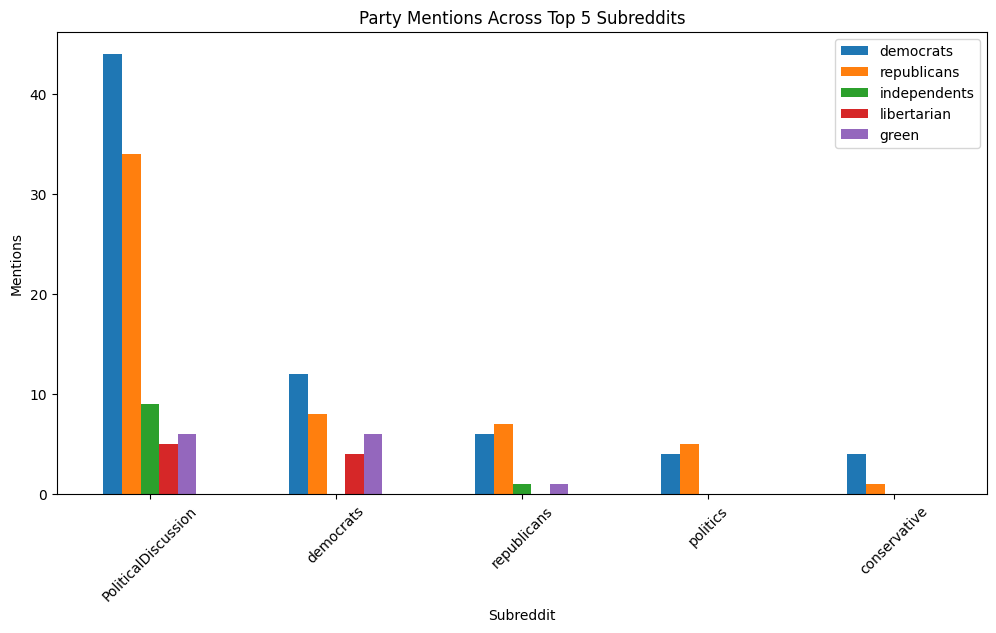

In [24]:
# Count the number of posts per subreddit
subreddit_counts = df['Subreddit'].value_counts()

# Plot the subreddit distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='Set2')
plt.title('Number of Posts Per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

# Examine party mentions across subreddits
party_by_subreddit = df.groupby('Subreddit')[party_columns].sum()

# Plot party mentions for top 5 subreddits
top_subreddits = party_by_subreddit.sum(axis=1).nlargest(5).index
party_by_subreddit.loc[top_subreddits].plot(kind='bar', figsize=(12, 6))
plt.title('Party Mentions Across Top 5 Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Mentions')
plt.xticks(rotation=45)
plt.show()

In [26]:
pip install textblob nltk

In [27]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Load the dataset
df = pd.read_csv('reddit_us_election_data_with_parties.csv')

In [28]:
def get_sentiment_textblob(text):
    # TextBlob sentiment analysis
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns the polarity (-1 to 1)

In [29]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    # VADER sentiment analysis
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score (-1 to 1)

In [31]:
# Ensure 'Body' column is of string type and handle NaN values
df['Body'] = df['Body'].fillna('').astype(str)

# Apply TextBlob Sentiment Analysis to Title and Body
df['Sentiment_TextBlob_Title'] = df['Title'].apply(get_sentiment_textblob)
df['Sentiment_TextBlob_Body'] = df['Body'].apply(get_sentiment_textblob)

# Apply VADER Sentiment Analysis to Title and Body
df['Sentiment_Vader_Title'] = df['Title'].apply(get_sentiment_vader)
df['Sentiment_Vader_Body'] = df['Body'].apply(get_sentiment_vader)

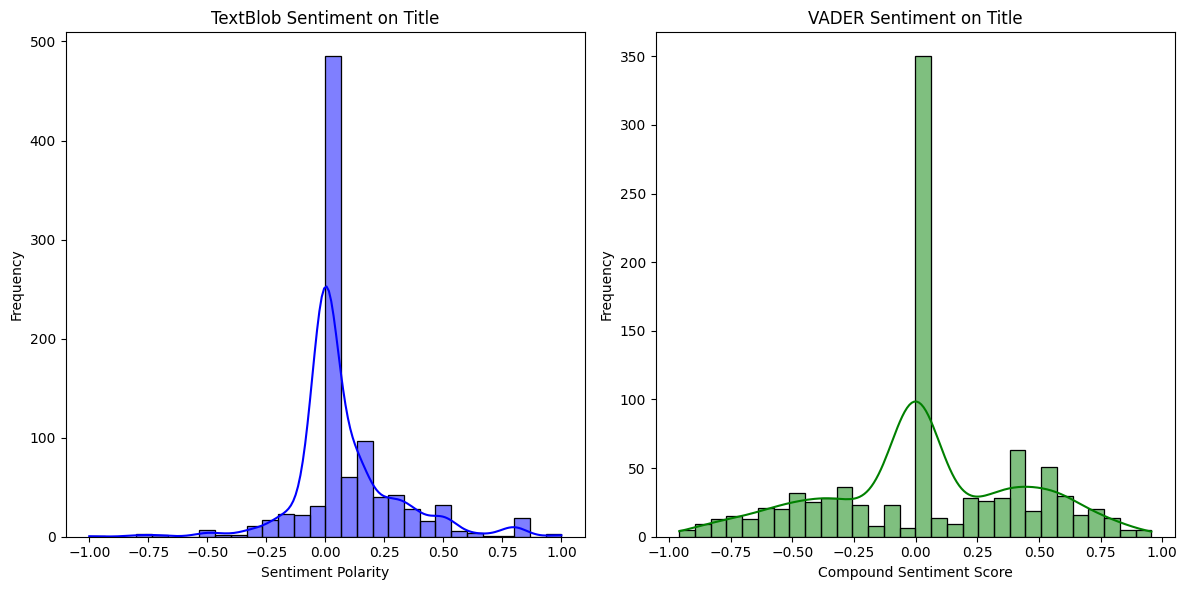

Sentiment_TextBlob_Title    0.080183
Sentiment_TextBlob_Body     0.034150
Sentiment_Vader_Title       0.032250
Sentiment_Vader_Body        0.129634
dtype: float64


In [32]:
# Check basic statistics of sentiment scores
df[['Sentiment_TextBlob_Title', 'Sentiment_TextBlob_Body', 
    'Sentiment_Vader_Title', 'Sentiment_Vader_Body']].describe()

# Plot distribution of sentiment scores for both methods (TextBlob and VADER)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot for TextBlob sentiment on Title
plt.subplot(1, 2, 1)
sns.histplot(df['Sentiment_TextBlob_Title'], kde=True, color='blue', bins=30)
plt.title('TextBlob Sentiment on Title')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Plot for VADER sentiment on Title
plt.subplot(1, 2, 2)
sns.histplot(df['Sentiment_Vader_Title'], kde=True, color='green', bins=30)
plt.title('VADER Sentiment on Title')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check for average sentiment for title and body using both methods
average_sentiment = df[['Sentiment_TextBlob_Title', 'Sentiment_TextBlob_Body', 
                        'Sentiment_Vader_Title', 'Sentiment_Vader_Body']].mean()
print(average_sentiment)

In [33]:
def categorize_sentiment_textblob(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply categorization
df['Sentiment_Category_TextBlob_Title'] = df['Sentiment_TextBlob_Title'].apply(categorize_sentiment_textblob)
df['Sentiment_Category_TextBlob_Body'] = df['Sentiment_TextBlob_Body'].apply(categorize_sentiment_textblob)

In [34]:
def categorize_sentiment_vader(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['Sentiment_Category_Vader_Title'] = df['Sentiment_Vader_Title'].apply(categorize_sentiment_vader)
df['Sentiment_Category_Vader_Body'] = df['Sentiment_Vader_Body'].apply(categorize_sentiment_vader)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1369119420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category_TextBlob_Title', data=df, palette='coolwarm')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1369119420.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category_Vader_Title', data=df, palette='coolwarm')


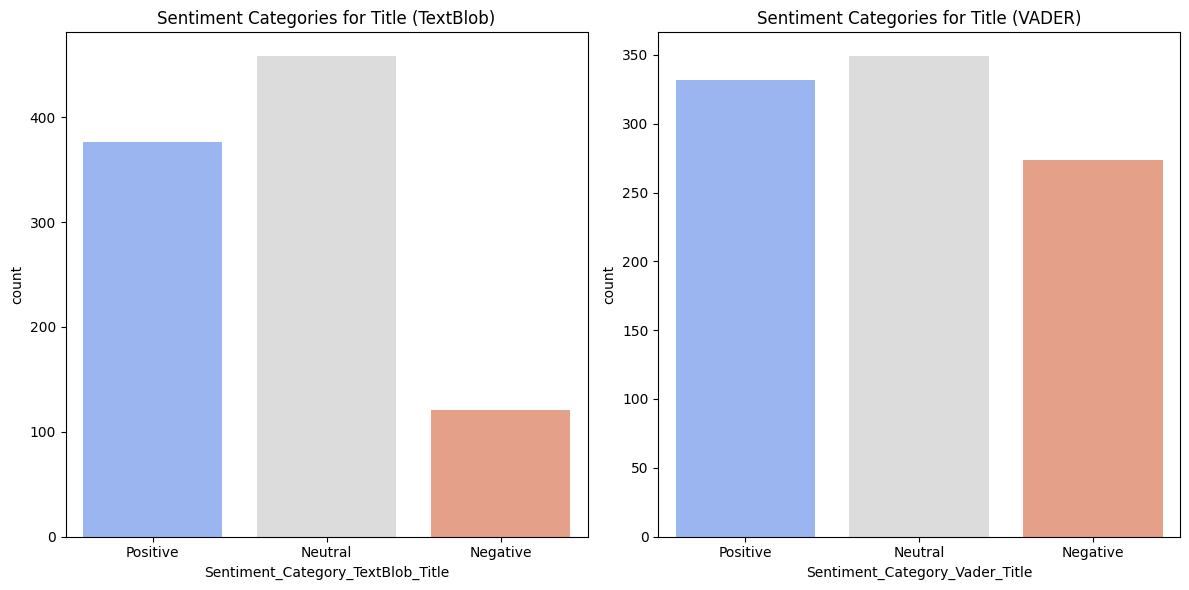

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1369119420.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category_TextBlob_Body', data=df, palette='coolwarm')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1369119420.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category_Vader_Body', data=df, palette='coolwarm')


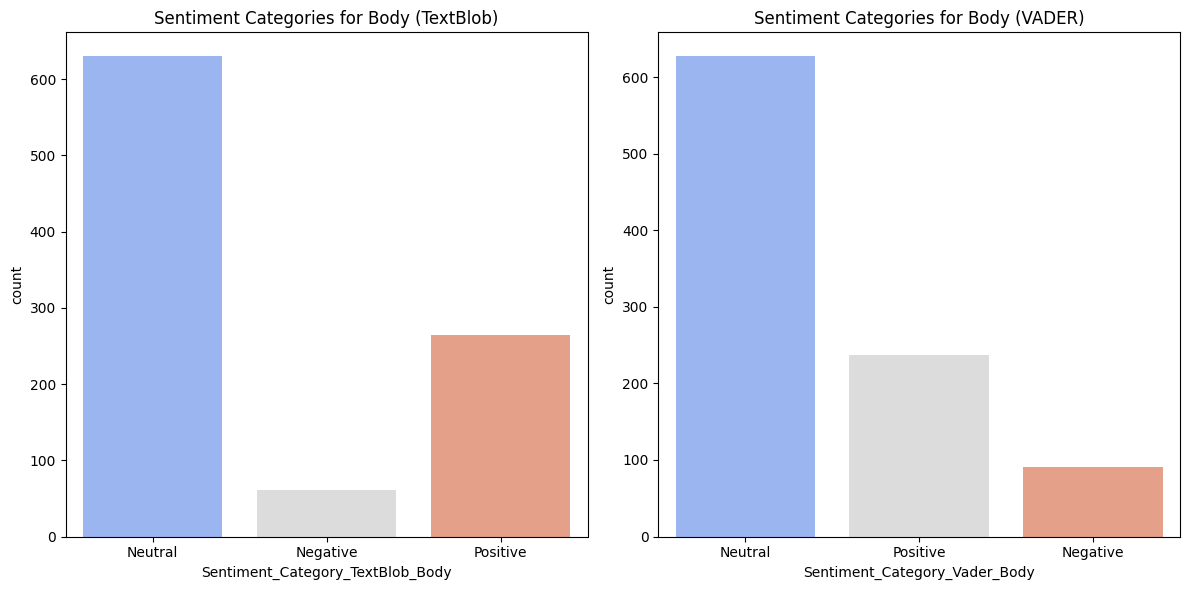

In [35]:
# Plot sentiment categories for the title (TextBlob and VADER)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment_Category_TextBlob_Title', data=df, palette='coolwarm')
plt.title('Sentiment Categories for Title (TextBlob)')

plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment_Category_Vader_Title', data=df, palette='coolwarm')
plt.title('Sentiment Categories for Title (VADER)')

plt.tight_layout()
plt.show()

# Plot sentiment categories for the body (TextBlob and VADER)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment_Category_TextBlob_Body', data=df, palette='coolwarm')
plt.title('Sentiment Categories for Body (TextBlob)')

plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment_Category_Vader_Body', data=df, palette='coolwarm')
plt.title('Sentiment Categories for Body (VADER)')

plt.tight_layout()
plt.show()

In [42]:
# Filter posts for 'democrats' and 'republicans'
df_democrats = df[df['Subreddit'] == 'democrats']
df_republicans = df[df['Subreddit'] == 'republicans']

In [43]:
# TextBlob Sentiment Analysis for Democrats and Republicans (Title and Body)
df_democrats['Sentiment_TextBlob_Title'] = df_democrats['Title'].apply(get_sentiment_textblob)
df_democrats['Sentiment_TextBlob_Body'] = df_democrats['Body'].apply(get_sentiment_textblob)

df_republicans['Sentiment_TextBlob_Title'] = df_republicans['Title'].apply(get_sentiment_textblob)
df_republicans['Sentiment_TextBlob_Body'] = df_republicans['Body'].apply(get_sentiment_textblob)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1722817772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_democrats['Sentiment_TextBlob_Title'] = df_democrats['Title'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1722817772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_democrats['Sentiment_TextBlob_Body'] = df_democrats['Body'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1722817772.py:5: SettingWithCopyWarning: 
A valu

In [44]:
# VADER Sentiment Analysis for Democrats and Republicans (Title and Body)
df_democrats['Sentiment_Vader_Title'] = df_democrats['Title'].apply(get_sentiment_vader)
df_democrats['Sentiment_Vader_Body'] = df_democrats['Body'].apply(get_sentiment_vader)

df_republicans['Sentiment_Vader_Title'] = df_republicans['Title'].apply(get_sentiment_vader)
df_republicans['Sentiment_Vader_Body'] = df_republicans['Body'].apply(get_sentiment_vader)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1460202065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_democrats['Sentiment_Vader_Title'] = df_democrats['Title'].apply(get_sentiment_vader)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1460202065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_democrats['Sentiment_Vader_Body'] = df_democrats['Body'].apply(get_sentiment_vader)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1460202065.py:5: SettingWithCopyWarning: 
A value is trying 

In [45]:
# Calculate average sentiment for Democrats and Republicans
democrats_avg_sentiment_title = df_democrats['Sentiment_TextBlob_Title'].mean()
democrats_avg_sentiment_body = df_democrats['Sentiment_TextBlob_Body'].mean()

republicans_avg_sentiment_title = df_republicans['Sentiment_TextBlob_Title'].mean()
republicans_avg_sentiment_body = df_republicans['Sentiment_TextBlob_Body'].mean()

# Print the average sentiment values
print(f"Democrats - Avg Sentiment (Title): {democrats_avg_sentiment_title}")
print(f"Democrats - Avg Sentiment (Body): {democrats_avg_sentiment_body}")
print(f"Republicans - Avg Sentiment (Title): {republicans_avg_sentiment_title}")
print(f"Republicans - Avg Sentiment (Body): {republicans_avg_sentiment_body}")

Democrats - Avg Sentiment (Title): 0.06764491833153806
Democrats - Avg Sentiment (Body): 0.027264757026200903
Republicans - Avg Sentiment (Title): 0.0920288842336177
Republicans - Avg Sentiment (Body): 0.045061568295079776


In [46]:
# Calculate average sentiment for Democrats and Republicans using VADER
democrats_avg_sentiment_vader_title = df_democrats['Sentiment_Vader_Title'].mean()
democrats_avg_sentiment_vader_body = df_democrats['Sentiment_Vader_Body'].mean()

republicans_avg_sentiment_vader_title = df_republicans['Sentiment_Vader_Title'].mean()
republicans_avg_sentiment_vader_body = df_republicans['Sentiment_Vader_Body'].mean()

# Print the average sentiment values for VADER
print(f"Democrats (VADER) - Avg Sentiment (Title): {democrats_avg_sentiment_vader_title}")
print(f"Democrats (VADER) - Avg Sentiment (Body): {democrats_avg_sentiment_vader_body}")
print(f"Republicans (VADER) - Avg Sentiment (Title): {republicans_avg_sentiment_vader_title}")
print(f"Republicans (VADER) - Avg Sentiment (Body): {republicans_avg_sentiment_vader_body}")

Democrats (VADER) - Avg Sentiment (Title): 0.04337605633802818
Democrats (VADER) - Avg Sentiment (Body): 0.07942441314553991
Republicans (VADER) - Avg Sentiment (Title): 0.02226323529411764
Republicans (VADER) - Avg Sentiment (Body): 0.14154264705882352


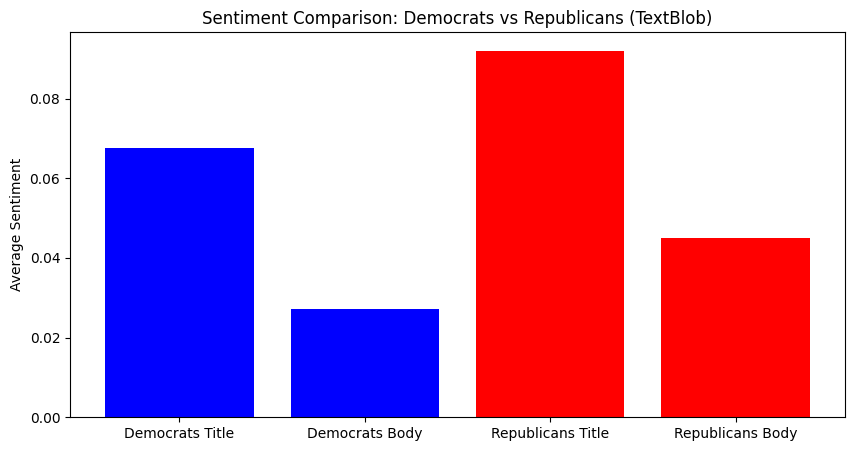

In [47]:
import matplotlib.pyplot as plt

# Create a bar plot to compare average sentiment
labels = ['Democrats Title', 'Democrats Body', 'Republicans Title', 'Republicans Body']
textblob_sentiments = [
    democrats_avg_sentiment_title, democrats_avg_sentiment_body,
    republicans_avg_sentiment_title, republicans_avg_sentiment_body
]

# Plot the sentiment comparison for TextBlob
plt.figure(figsize=(10, 5))
plt.bar(labels, textblob_sentiments, color=['blue', 'blue', 'red', 'red'])
plt.title('Sentiment Comparison: Democrats vs Republicans (TextBlob)')
plt.ylabel('Average Sentiment')
plt.show()

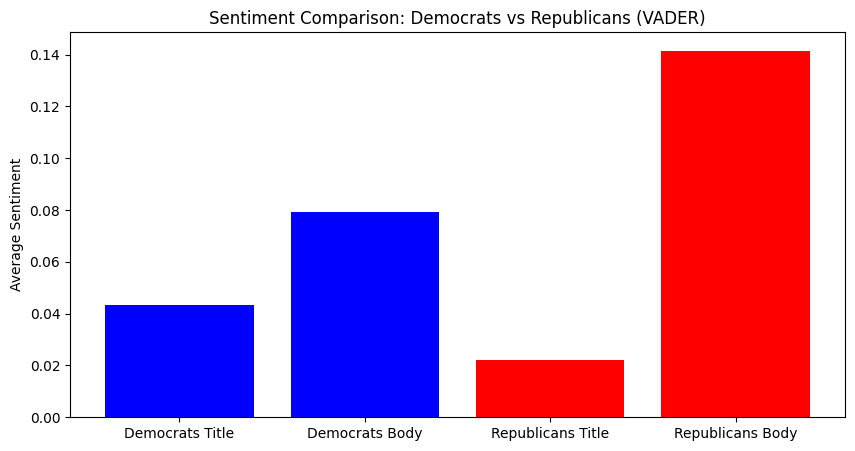

In [48]:
# Create a bar plot to compare average sentiment using VADER
vader_sentiments = [
    democrats_avg_sentiment_vader_title, democrats_avg_sentiment_vader_body,
    republicans_avg_sentiment_vader_title, republicans_avg_sentiment_vader_body
]

# Plot the sentiment comparison for VADER
plt.figure(figsize=(10, 5))
plt.bar(labels, vader_sentiments, color=['blue', 'blue', 'red', 'red'])
plt.title('Sentiment Comparison: Democrats vs Republicans (VADER)')
plt.ylabel('Average Sentiment')
plt.show()

In [53]:
# Extract year for grouping
trump_posts_df['Year'] = trump_posts_df['Created'].dt.year

# Filter data to include only from 2020 to 2025
trump_posts_df = trump_posts_df[trump_posts_df['Year'].between(2020, 2025)]

# Group by Year and calculate the average sentiment for both Title and Body
avg_sentiment_trump_textblob_title_year = trump_posts_df.groupby('Year')['Sentiment_TextBlob_Title'].mean()
avg_sentiment_trump_textblob_body_year = trump_posts_df.groupby('Year')['Sentiment_TextBlob_Body'].mean()

avg_sentiment_trump_vader_title_year = trump_posts_df.groupby('Year')['Sentiment_Vader_Title'].mean()
avg_sentiment_trump_vader_body_year = trump_posts_df.groupby('Year')['Sentiment_Vader_Body'].mean()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\2344318767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_posts_df['Year'] = trump_posts_df['Created'].dt.year


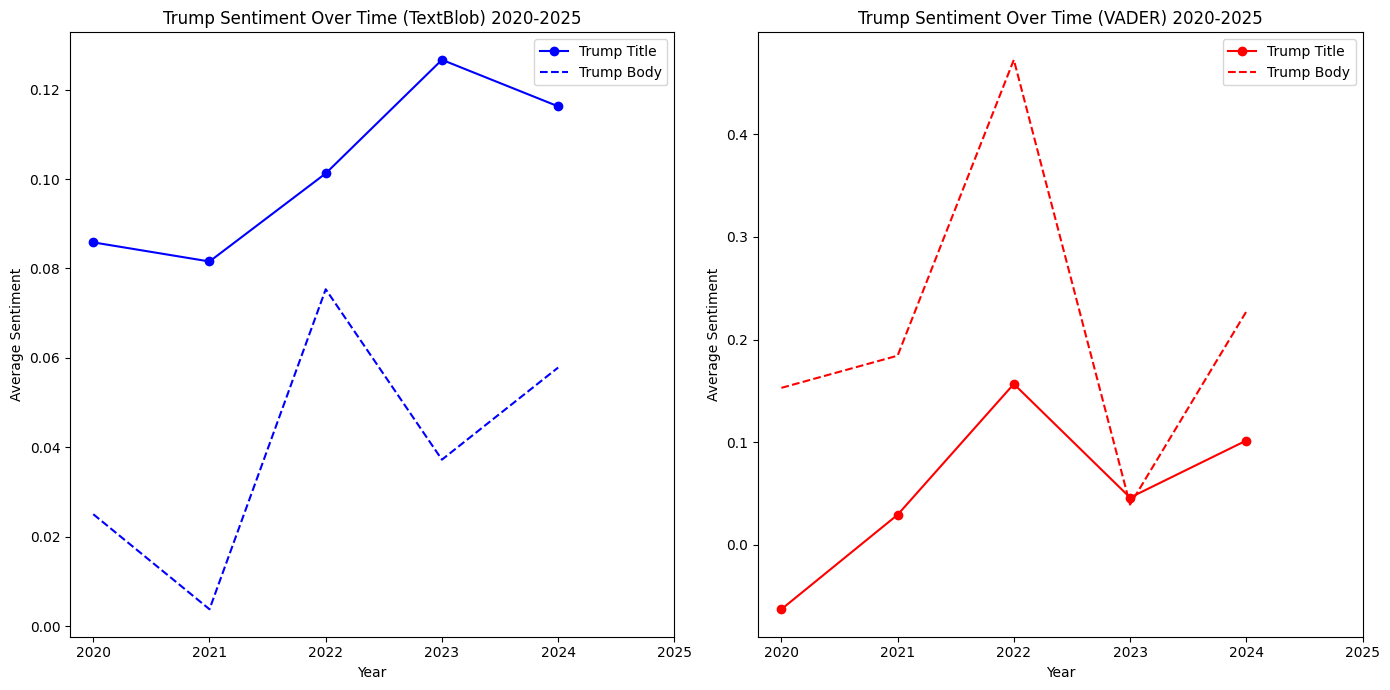

In [54]:
import matplotlib.pyplot as plt

# Create a figure with two subplots for TextBlob and VADER sentiment
plt.figure(figsize=(14, 7))

# Subplot for TextBlob sentiment analysis
plt.subplot(1, 2, 1)
plt.plot(avg_sentiment_trump_textblob_title_year.index, avg_sentiment_trump_textblob_title_year, label='Trump Title', color='blue', marker='o')
plt.plot(avg_sentiment_trump_textblob_body_year.index, avg_sentiment_trump_textblob_body_year, label='Trump Body', color='blue', linestyle='--')
plt.title('Trump Sentiment Over Time (TextBlob) 2020-2025')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(range(2020, 2026))  # Show x-axis from 2020 to 2025
plt.legend()

# Subplot for VADER sentiment analysis
plt.subplot(1, 2, 2)
plt.plot(avg_sentiment_trump_vader_title_year.index, avg_sentiment_trump_vader_title_year, label='Trump Title', color='red', marker='o')
plt.plot(avg_sentiment_trump_vader_body_year.index, avg_sentiment_trump_vader_body_year, label='Trump Body', color='red', linestyle='--')
plt.title('Trump Sentiment Over Time (VADER) 2020-2025')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(range(2020, 2026))  # Show x-axis from 2020 to 2025
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [60]:
# Filter posts containing "Biden" and "Harris" separately in the title or body
biden_posts_df = df[df['Title'].str.contains("Biden", case=False, na=False) | 
                    df['Body'].str.contains("Biden", case=False, na=False)]

harris_posts_df = df[df['Title'].str.contains("Harris", case=False, na=False) | 
                     df['Body'].str.contains("Harris", case=False, na=False)]

In [61]:
# Apply TextBlob Sentiment Analysis to Title and Body for Biden
biden_posts_df['Sentiment_TextBlob_Title'] = biden_posts_df['Title'].apply(get_sentiment_textblob)
biden_posts_df['Sentiment_TextBlob_Body'] = biden_posts_df['Body'].apply(get_sentiment_textblob)

# Apply VADER Sentiment Analysis to Title and Body for Biden
biden_posts_df['Sentiment_Vader_Title'] = biden_posts_df['Title'].apply(get_sentiment_vader)
biden_posts_df['Sentiment_Vader_Body'] = biden_posts_df['Body'].apply(get_sentiment_vader)

# Apply TextBlob Sentiment Analysis to Title and Body for Harris
harris_posts_df['Sentiment_TextBlob_Title'] = harris_posts_df['Title'].apply(get_sentiment_textblob)
harris_posts_df['Sentiment_TextBlob_Body'] = harris_posts_df['Body'].apply(get_sentiment_textblob)

# Apply VADER Sentiment Analysis to Title and Body for Harris
harris_posts_df['Sentiment_Vader_Title'] = harris_posts_df['Title'].apply(get_sentiment_vader)
harris_posts_df['Sentiment_Vader_Body'] = harris_posts_df['Body'].apply(get_sentiment_vader)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3803142985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Sentiment_TextBlob_Title'] = biden_posts_df['Title'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3803142985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Sentiment_TextBlob_Body'] = biden_posts_df['Body'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3803142985.py:6: SettingWithCopyWarning:

In [62]:
# Convert 'Created' column to datetime format
biden_posts_df['Created'] = pd.to_datetime(biden_posts_df['Created'], errors='coerce')
harris_posts_df['Created'] = pd.to_datetime(harris_posts_df['Created'], errors='coerce')

# Extract the year from 'Created' column
biden_posts_df['Year'] = biden_posts_df['Created'].dt.year
harris_posts_df['Year'] = harris_posts_df['Created'].dt.year

# Filter data to include only from 2020 to 2025 for both Biden and Harris
biden_posts_df = biden_posts_df[biden_posts_df['Year'].between(2020, 2025)]
harris_posts_df = harris_posts_df[harris_posts_df['Year'].between(2020, 2025)]

# Group by Year and calculate the average sentiment for both Title and Body for Biden
avg_sentiment_biden_textblob_title_year = biden_posts_df.groupby('Year')['Sentiment_TextBlob_Title'].mean()
avg_sentiment_biden_textblob_body_year = biden_posts_df.groupby('Year')['Sentiment_TextBlob_Body'].mean()

avg_sentiment_biden_vader_title_year = biden_posts_df.groupby('Year')['Sentiment_Vader_Title'].mean()
avg_sentiment_biden_vader_body_year = biden_posts_df.groupby('Year')['Sentiment_Vader_Body'].mean()

# Group by Year and calculate the average sentiment for both Title and Body for Harris
avg_sentiment_harris_textblob_title_year = harris_posts_df.groupby('Year')['Sentiment_TextBlob_Title'].mean()
avg_sentiment_harris_textblob_body_year = harris_posts_df.groupby('Year')['Sentiment_TextBlob_Body'].mean()

avg_sentiment_harris_vader_title_year = harris_posts_df.groupby('Year')['Sentiment_Vader_Title'].mean()
avg_sentiment_harris_vader_body_year = harris_posts_df.groupby('Year')['Sentiment_Vader_Body'].mean()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\627725118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Created'] = pd.to_datetime(biden_posts_df['Created'], errors='coerce')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\627725118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harris_posts_df['Created'] = pd.to_datetime(harris_posts_df['Created'], errors='coerce')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\627725118.py:6: SettingWithCopyWarning: 
A value is trying to 

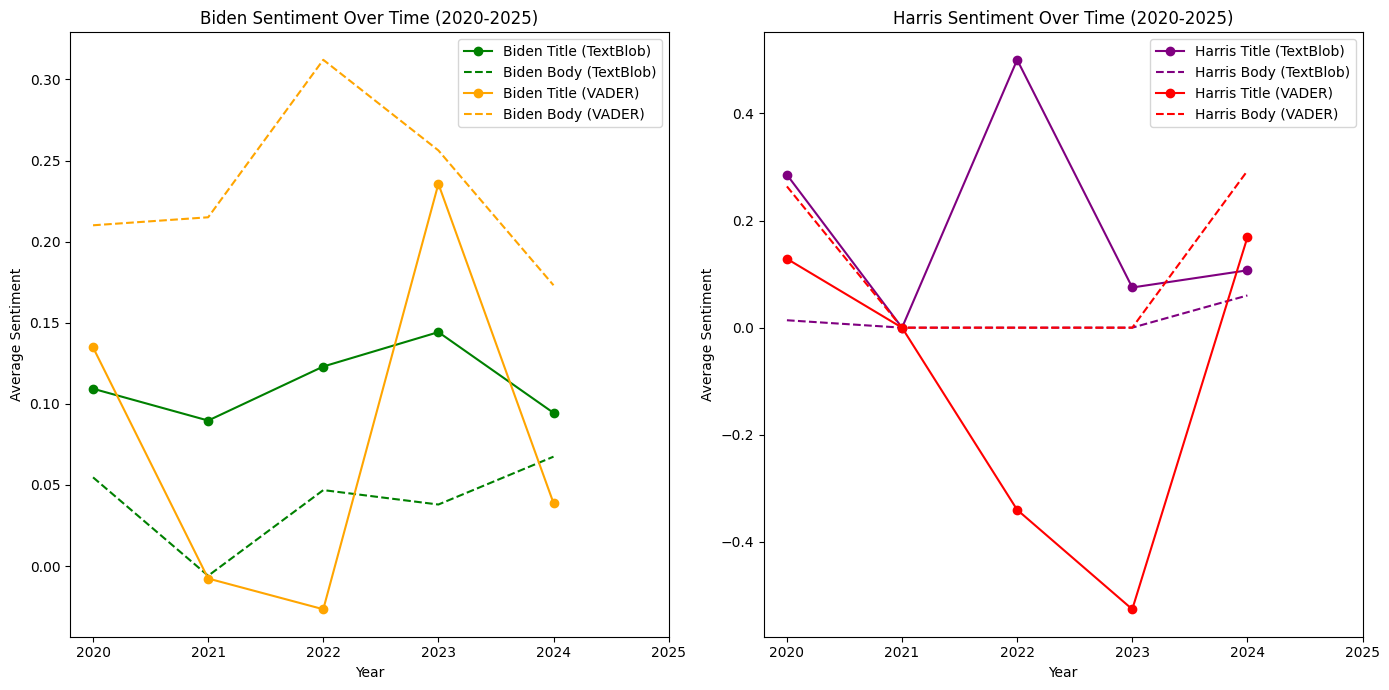

In [63]:
import matplotlib.pyplot as plt

# Create two separate plots for Biden and Harris sentiment analysis
plt.figure(figsize=(14, 7))

# Plot for Biden's sentiment analysis
plt.subplot(1, 2, 1)
plt.plot(avg_sentiment_biden_textblob_title_year.index, avg_sentiment_biden_textblob_title_year, label='Biden Title (TextBlob)', color='green', marker='o')
plt.plot(avg_sentiment_biden_textblob_body_year.index, avg_sentiment_biden_textblob_body_year, label='Biden Body (TextBlob)', color='green', linestyle='--')
plt.plot(avg_sentiment_biden_vader_title_year.index, avg_sentiment_biden_vader_title_year, label='Biden Title (VADER)', color='orange', marker='o')
plt.plot(avg_sentiment_biden_vader_body_year.index, avg_sentiment_biden_vader_body_year, label='Biden Body (VADER)', color='orange', linestyle='--')
plt.title('Biden Sentiment Over Time (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(range(2020, 2026))  # Show x-axis from 2020 to 2025
plt.legend()

# Plot for Harris's sentiment analysis
plt.subplot(1, 2, 2)
plt.plot(avg_sentiment_harris_textblob_title_year.index, avg_sentiment_harris_textblob_title_year, label='Harris Title (TextBlob)', color='purple', marker='o')
plt.plot(avg_sentiment_harris_textblob_body_year.index, avg_sentiment_harris_textblob_body_year, label='Harris Body (TextBlob)', color='purple', linestyle='--')
plt.plot(avg_sentiment_harris_vader_title_year.index, avg_sentiment_harris_vader_title_year, label='Harris Title (VADER)', color='red', marker='o')
plt.plot(avg_sentiment_harris_vader_body_year.index, avg_sentiment_harris_vader_body_year, label='Harris Body (VADER)', color='red', linestyle='--')
plt.title('Harris Sentiment Over Time (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(range(2020, 2026))  # Show x-axis from 2020 to 2025
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [64]:
# Filter the posts dataset for the US election-related content
election_posts_df = posts_df[posts_df['Title'].str.contains('US election', case=False, na=False)]

In [65]:
# Apply TextBlob Sentiment Analysis on Title or Body
election_posts_df['Sentiment_TextBlob_Title'] = election_posts_df['Title'].apply(get_sentiment_textblob)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1243484437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_posts_df['Sentiment_TextBlob_Title'] = election_posts_df['Title'].apply(get_sentiment_textblob)


In [66]:
# Extract the date (you can adjust to month or year depending on the time scale)
election_posts_df['Created'] = pd.to_datetime(election_posts_df['Created'], errors='coerce')
election_posts_df['Month'] = election_posts_df['Created'].dt.to_period('M')  # Group by month

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3001339002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_posts_df['Created'] = pd.to_datetime(election_posts_df['Created'], errors='coerce')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3001339002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_posts_df['Month'] = election_posts_df['Created'].dt.to_period('M')  # Group by month


In [67]:
# Calculate the average sentiment by month
sentiment_progression = election_posts_df.groupby('Month')['Sentiment_TextBlob_Title'].mean()

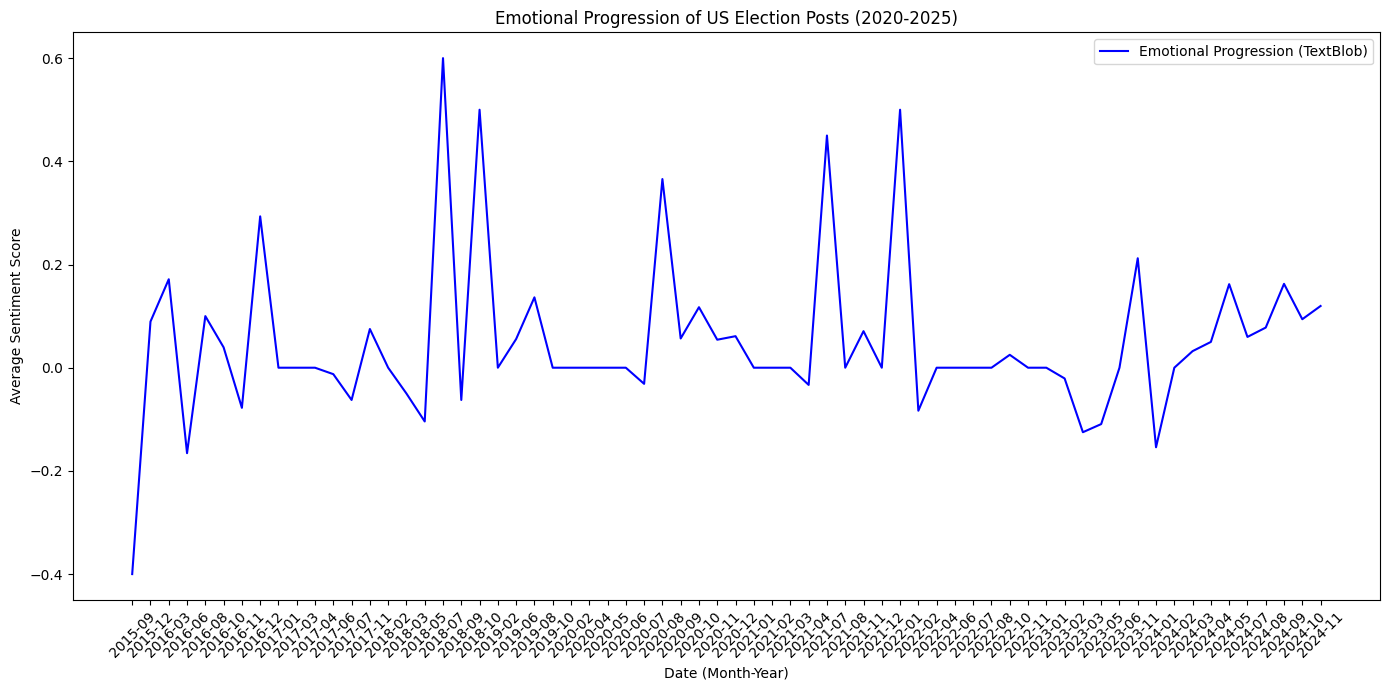

In [68]:
import matplotlib.pyplot as plt

# Plotting the emotional progression over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_progression.index.astype(str), sentiment_progression, label='Emotional Progression (TextBlob)', color='blue')
plt.title('Emotional Progression of US Election Posts (2020-2025)')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [69]:
# Sort the DataFrame by 'Score' in descending order to get the most upvoted posts
top_10_upvoted_posts = posts_df.sort_values(by='Score', ascending=False).head(10)

In [71]:
# Display the top 10 most upvoted posts
top_10_upvoted_posts[['Title', 'Score', 'Num_Comments']]

,Title,Score,Num_Comments
37,Megathread: Joe Biden Projected to Defeat Pres...,214315,81400
481,For those of you comparing these protests to B...,111202,7741
39,US election: Biden event in Texas cancelled as...,95492,10153
41,US election: Biden becomes first-ever presiden...,91294,5617
42,Donald Trump tells supporters he has 'never lo...,82095,5104
48,Joe Biden is the first president-elect in US h...,72337,2838
49,Twitter is publicly declaring Joe Biden the wi...,63385,2455
24,Megathread: Mary Peltola Defeats Sarah Palin i...,61640,4407
47,Google will no longer fund any members of Cong...,59436,2281
53,Adam Schiff: Russia Is Still Interfering With ...,49873,3270


C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\2319019374.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


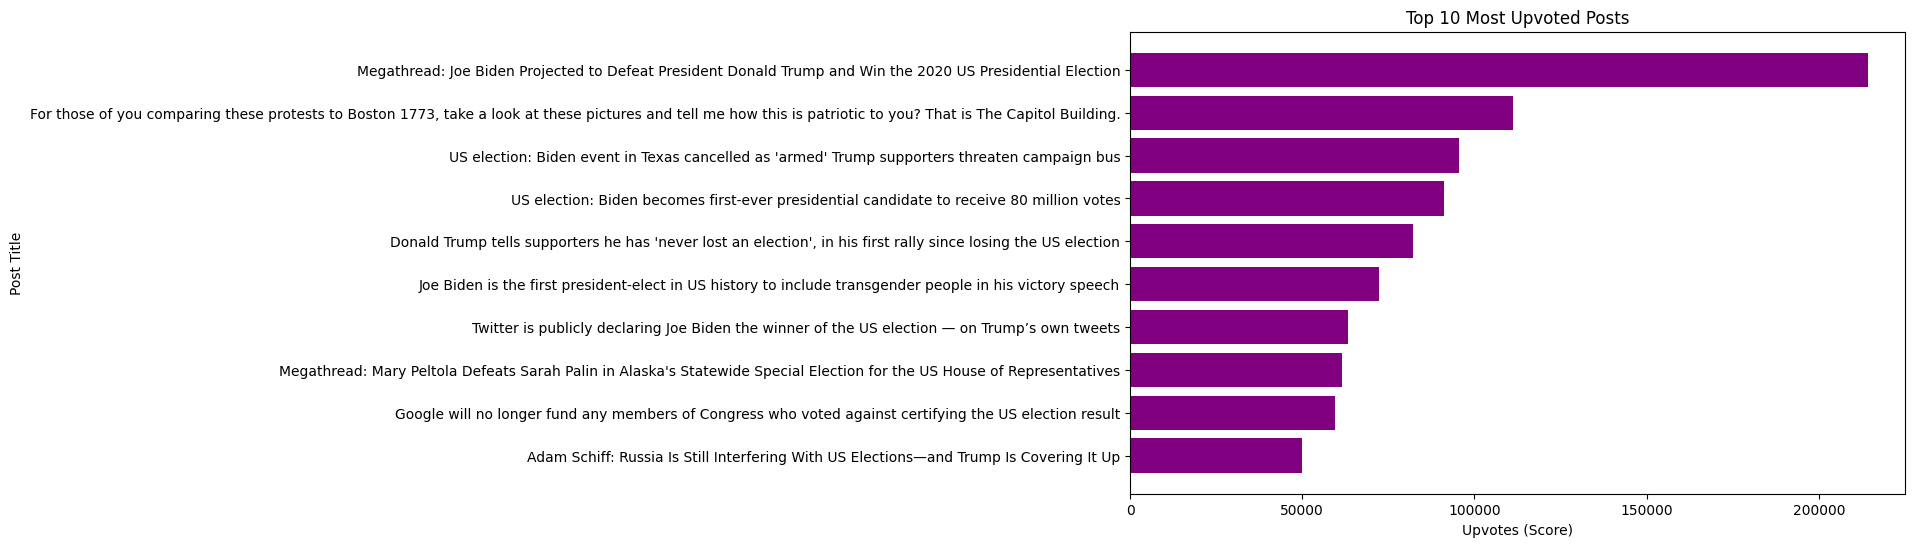

In [72]:
import matplotlib.pyplot as plt

# Plot the top 10 most upvoted posts
plt.figure(figsize=(10, 6))
plt.barh(top_10_upvoted_posts['Title'], top_10_upvoted_posts['Score'], color='purple')
plt.xlabel('Upvotes (Score)')
plt.ylabel('Post Title')
plt.title('Top 10 Most Upvoted Posts')
plt.gca().invert_yaxis()  # To have the highest upvoted post at the top
plt.tight_layout()
plt.show()

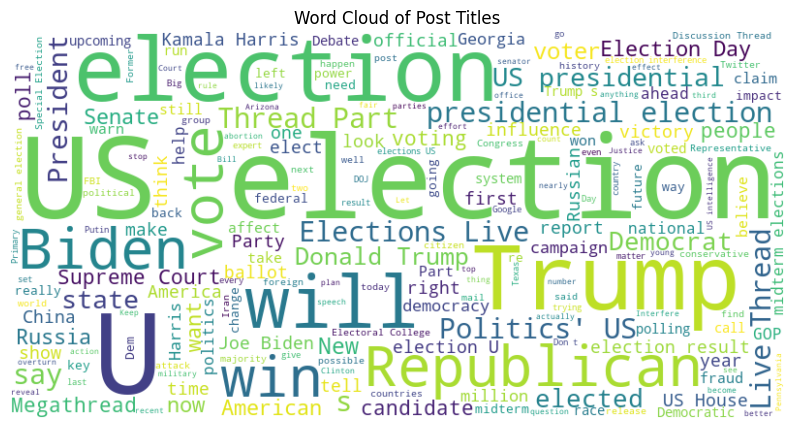

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into a single string
text = ' '.join(posts_df['Title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Post Titles')
plt.show()

In [74]:
# Filter posts that mention "Trump" in the title or body
trump_posts_df = posts_df[posts_df['Title'].str.contains('Trump', case=False, na=False) |
                           posts_df['Body'].str.contains('Trump', case=False, na=False)]

In [75]:
# Apply TextBlob Sentiment Analysis to Title and Body
trump_posts_df['Sentiment_TextBlob_Title'] = trump_posts_df['Title'].apply(get_sentiment_textblob)
trump_posts_df['Sentiment_TextBlob_Body'] = trump_posts_df['Body'].apply(get_sentiment_textblob)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1007596170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_posts_df['Sentiment_TextBlob_Title'] = trump_posts_df['Title'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1007596170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_posts_df['Sentiment_TextBlob_Body'] = trump_posts_df['Body'].apply(get_sentiment_textblob)


In [76]:
# Extract the date (you can adjust to month or year depending on the time scale)
trump_posts_df['Created'] = pd.to_datetime(trump_posts_df['Created'], errors='coerce')
trump_posts_df['Month'] = trump_posts_df['Created'].dt.to_period('M')  # Group by month

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\2802213413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_posts_df['Created'] = pd.to_datetime(trump_posts_df['Created'], errors='coerce')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\2802213413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_posts_df['Month'] = trump_posts_df['Created'].dt.to_period('M')  # Group by month


In [77]:
# Calculate the average sentiment by month for Title and Body
sentiment_progression_trump = trump_posts_df.groupby('Month')['Sentiment_TextBlob_Title'].mean()

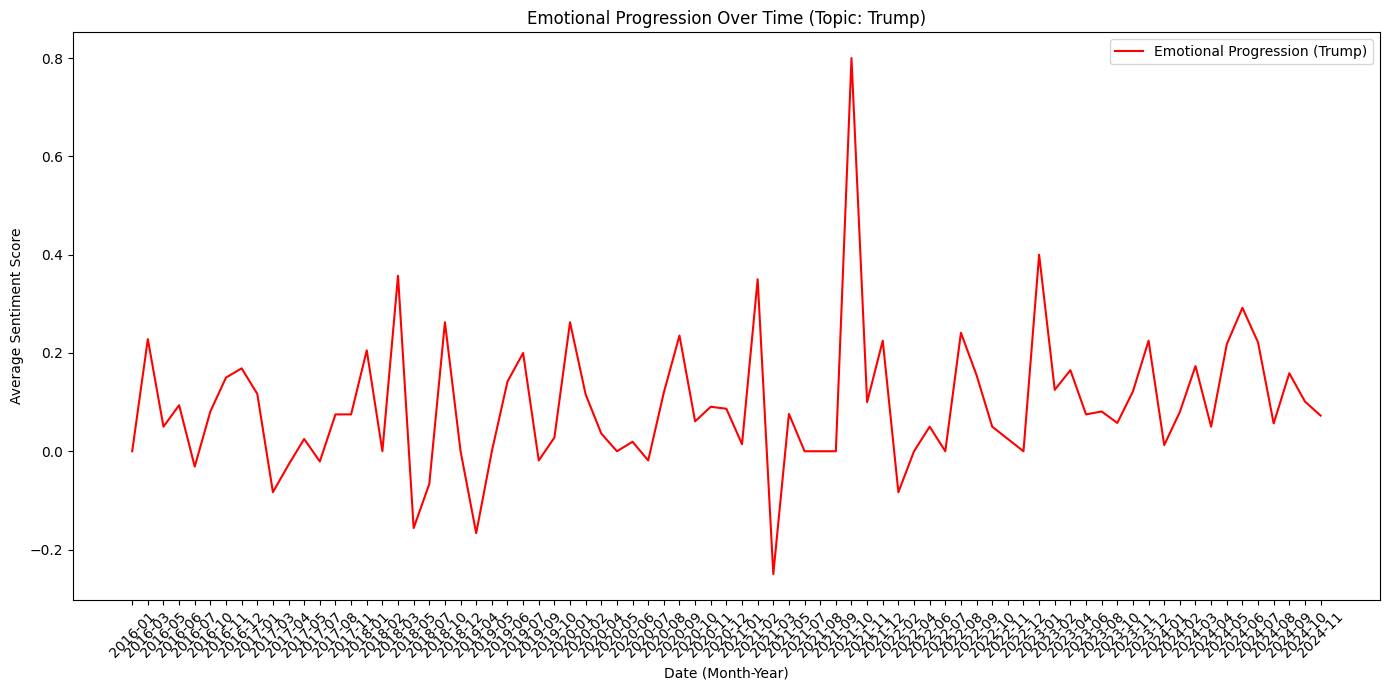

In [78]:
# Plotting the emotional progression over time for Trump
plt.figure(figsize=(14, 7))
plt.plot(sentiment_progression_trump.index.astype(str), sentiment_progression_trump, label='Emotional Progression (Trump)', color='red')
plt.title('Emotional Progression Over Time (Topic: Trump)')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [80]:
# Filter posts that mention "Democrats" in the title or body
democrats_posts_df = posts_df[posts_df['Title'].str.contains('Democrats', case=False, na=False) |
                               posts_df['Body'].str.contains('Democrats', case=False, na=False)]

In [81]:
# Apply TextBlob Sentiment Analysis to Title and Body
democrats_posts_df['Sentiment_TextBlob_Title'] = democrats_posts_df['Title'].apply(get_sentiment_textblob)
democrats_posts_df['Sentiment_TextBlob_Body'] = democrats_posts_df['Body'].apply(get_sentiment_textblob)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1239264061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats_posts_df['Sentiment_TextBlob_Title'] = democrats_posts_df['Title'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1239264061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats_posts_df['Sentiment_TextBlob_Body'] = democrats_posts_df['Body'].apply(get_sentiment_textblob)


In [82]:
# Extract the date (group by month or year depending on the time scale)
democrats_posts_df['Created'] = pd.to_datetime(democrats_posts_df['Created'], errors='coerce')
democrats_posts_df['Month'] = democrats_posts_df['Created'].dt.to_period('M')  # Group by month

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3846178341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats_posts_df['Created'] = pd.to_datetime(democrats_posts_df['Created'], errors='coerce')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3846178341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats_posts_df['Month'] = democrats_posts_df['Created'].dt.to_period('M')  # Group by month


In [83]:
# Calculate the average sentiment by month for Title and Body
sentiment_progression_democrats = democrats_posts_df.groupby('Month')['Sentiment_TextBlob_Title'].mean()

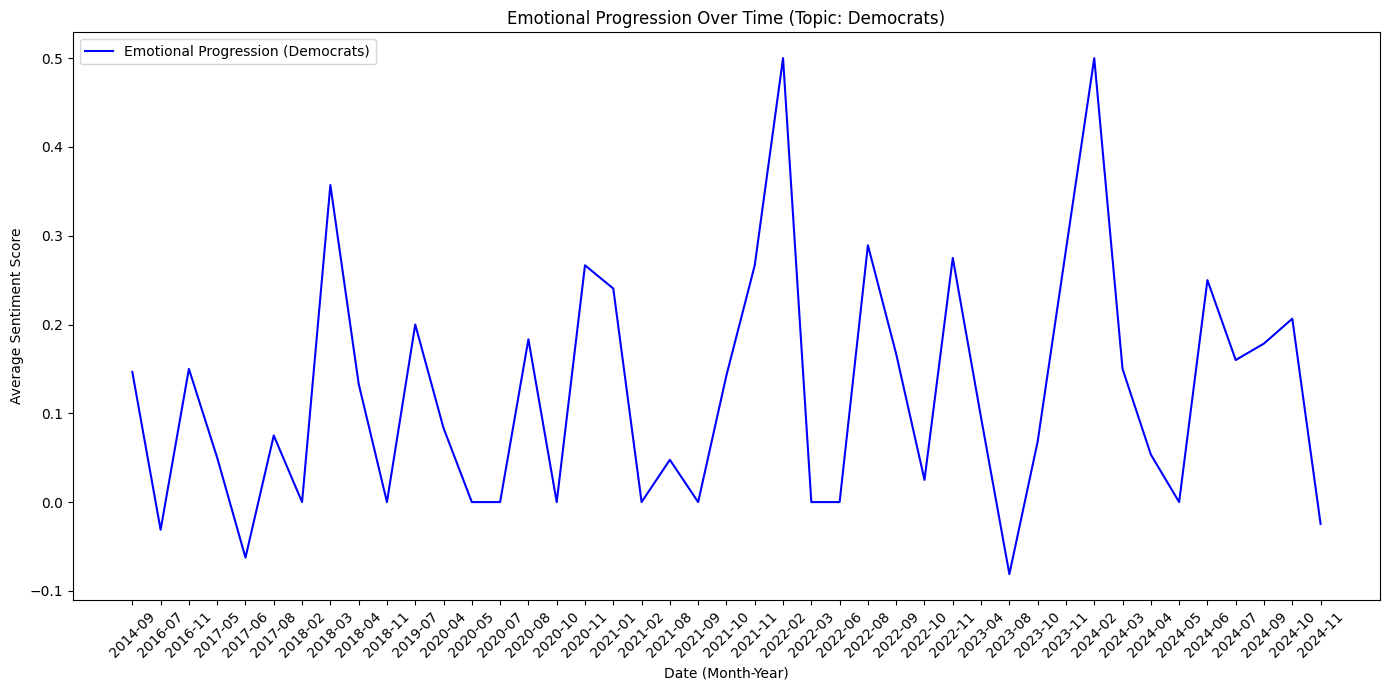

In [84]:
import matplotlib.pyplot as plt

# Plotting the emotional progression over time for Democrats
plt.figure(figsize=(14, 7))
plt.plot(sentiment_progression_democrats.index.astype(str), sentiment_progression_democrats, label='Emotional Progression (Democrats)', color='blue')
plt.title('Emotional Progression Over Time (Topic: Democrats)')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [90]:
# Filter posts that mention "Biden" in the title or body
biden_posts_df = posts_df[posts_df['Title'].str.contains('Biden', case=False, na=False) |
                          posts_df['Body'].str.contains('Biden', case=False, na=False)]

# Filter posts that mention "Harris" in the title or body
harris_posts_df = posts_df[posts_df['Title'].str.contains('Harris', case=False, na=False) |
                           posts_df['Body'].str.contains('Harris', case=False, na=False)]

In [91]:
# Apply TextBlob Sentiment Analysis to Title and Body for Biden
biden_posts_df['Sentiment_TextBlob_Title'] = biden_posts_df['Title'].apply(get_sentiment_textblob)
biden_posts_df['Sentiment_TextBlob_Body'] = biden_posts_df['Body'].apply(get_sentiment_textblob)

# Apply TextBlob Sentiment Analysis to Title and Body for Harris
harris_posts_df['Sentiment_TextBlob_Title'] = harris_posts_df['Title'].apply(get_sentiment_textblob)
harris_posts_df['Sentiment_TextBlob_Body'] = harris_posts_df['Body'].apply(get_sentiment_textblob)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3599046113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Sentiment_TextBlob_Title'] = biden_posts_df['Title'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3599046113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Sentiment_TextBlob_Body'] = biden_posts_df['Body'].apply(get_sentiment_textblob)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\3599046113.py:6: SettingWithCopyWarning:

In [92]:
# Extract the date and group by month for Biden
biden_posts_df['Created'] = pd.to_datetime(biden_posts_df['Created'], errors='coerce')
biden_posts_df['Month'] = biden_posts_df['Created'].dt.to_period('M')  # Group by month

# Extract the date and group by month for Harris
harris_posts_df['Created'] = pd.to_datetime(harris_posts_df['Created'], errors='coerce')
harris_posts_df['Month'] = harris_posts_df['Created'].dt.to_period('M')  # Group by month

C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1979102596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Created'] = pd.to_datetime(biden_posts_df['Created'], errors='coerce')
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1979102596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_posts_df['Month'] = biden_posts_df['Created'].dt.to_period('M')  # Group by month
C:\Users\sudhe\AppData\Local\Temp\ipykernel_27520\1979102596.py:6: SettingWithCopyWarning: 
A value is trying t

In [93]:
# Calculate the average sentiment by month for Biden (Title)
sentiment_progression_biden = biden_posts_df.groupby('Month')['Sentiment_TextBlob_Title'].mean()

# Calculate the average sentiment by month for Harris (Title)
sentiment_progression_harris = harris_posts_df.groupby('Month')['Sentiment_TextBlob_Title'].mean()

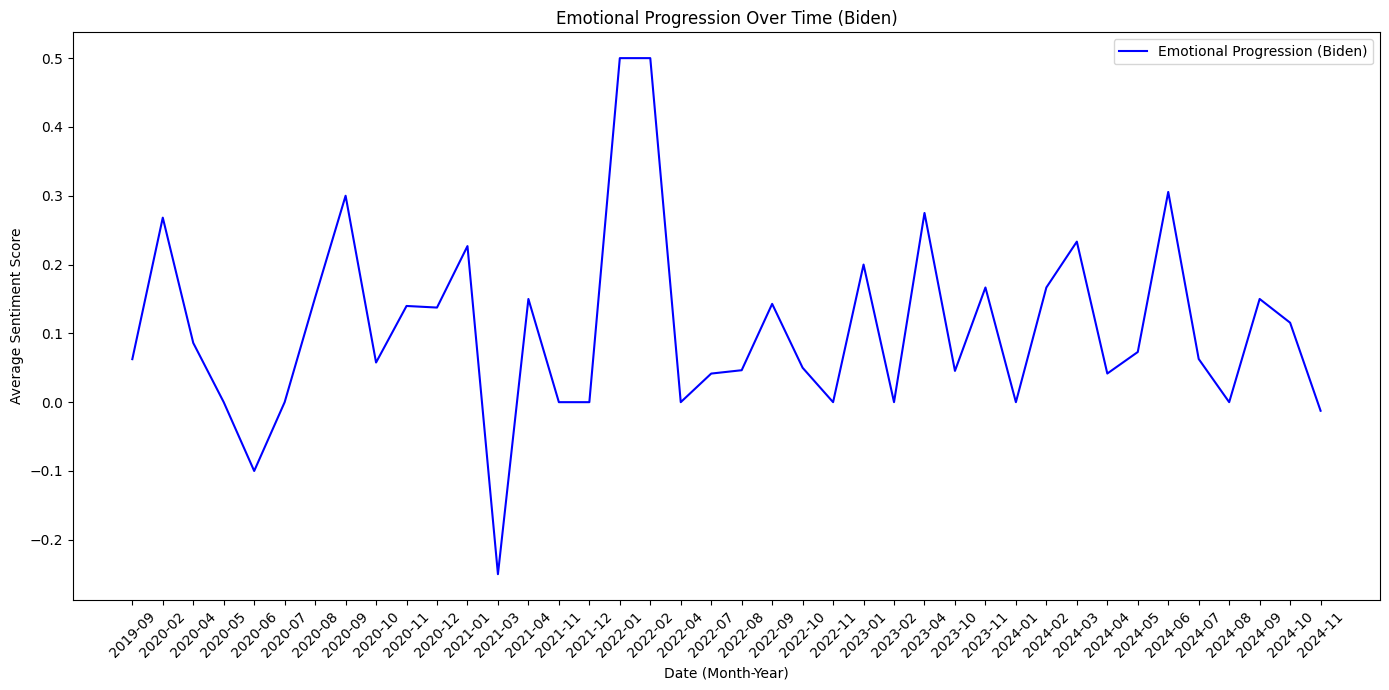

In [94]:
# Plotting the emotional progression over time for Biden
plt.figure(figsize=(14, 7))
plt.plot(sentiment_progression_biden.index.astype(str), sentiment_progression_biden, label='Emotional Progression (Biden)', color='blue')
plt.title('Emotional Progression Over Time (Biden)')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

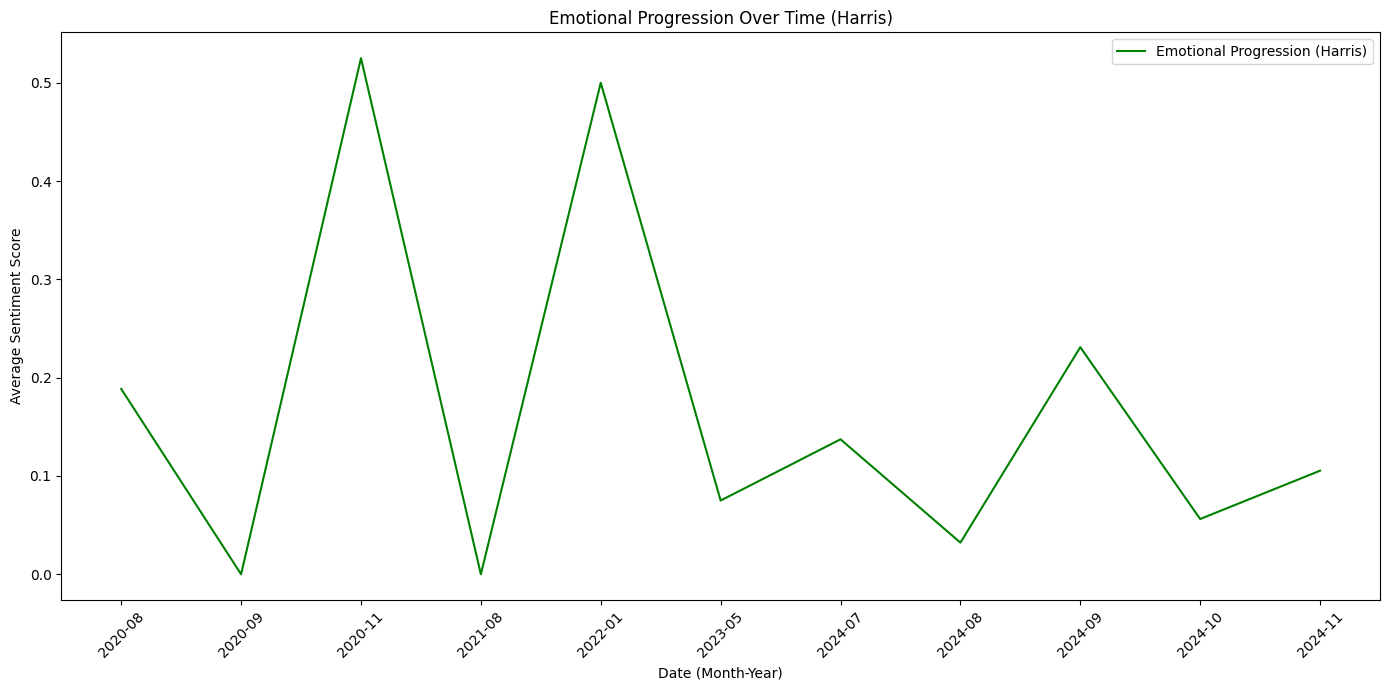

In [95]:
# Plotting the emotional progression over time for Harris
plt.figure(figsize=(14, 7))
plt.plot(sentiment_progression_harris.index.astype(str), sentiment_progression_harris, label='Emotional Progression (Harris)', color='green')
plt.title('Emotional Progression Over Time (Harris)')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Load data (assuming posts_df is the DataFrame)
# posts_df = pd.read_csv('reddit_us_election_data.csv')  # Uncomment if data is in a CSV file

# Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Vectorize Title and Body, filling NaN with empty strings
X_title = tfidf_vectorizer.fit_transform(posts_df['Title'].fillna('')).toarray()
X_body = tfidf_vectorizer.fit_transform(posts_df['Body'].fillna('')).toarray()

# Combine title and body features
X_combined = np.hstack([X_title, X_body])

# Define the target variable (Sentiment Label)
# Create binary labels based on TextBlob title sentiment, e.g., positive if >0.1, otherwise negative
posts_df['Sentiment_Label'] = np.where(posts_df['Sentiment_TextBlob_Title'] > 0.1, 1, 0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, posts_df['Sentiment_Label'], test_size=0.3, random_state=42)

# Initialize Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Model Training and Evaluation
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else "N/A"
    
    # Print results
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("AUC Score:", auc)
    print("\n")
    
    # Store results for comparison
    results[model_name] = {'Accuracy': accuracy, 'AUC': auc, 'Report': report}

# Optional: Display results summary for each model
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']}, AUC: {metrics['AUC']}")

--- Random Forest ---
Accuracy: 0.8466898954703833
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90       206
           1       0.97      0.47      0.63        81

    accuracy                           0.85       287
   macro avg       0.90      0.73      0.77       287
weighted avg       0.87      0.85      0.83       287

AUC Score: 0.8548483758839746


--- K-Nearest Neighbors ---
Accuracy: 0.7909407665505227
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       206
           1       0.92      0.28      0.43        81

    accuracy                           0.79       287
   macro avg       0.85      0.64      0.65       287
weighted avg       0.82      0.79      0.75       287

AUC Score: 0.6911782332494306


--- XGBoost ---
Accuracy: 0.8606271777003485
Classification Report:
               precision    recall  f1-score   support

  

In [104]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring for AUC to be used in cross-validation
scoring = {'accuracy': 'accuracy', 'auc': 'roc_auc'}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Dictionary to store cross-validation results
cv_results = {}

# Cross-validate each model
for model_name, model in models.items():
    print(f"--- Validating {model_name} ---")
    
    # Cross-validation for accuracy
    accuracy_scores = cross_val_score(model, X_combined, posts_df['Sentiment_Label'], cv=cv, scoring='accuracy')
    
    # Cross-validation for AUC, if available
    if hasattr(model, "predict_proba"):
        auc_scores = cross_val_score(model, X_combined, posts_df['Sentiment_Label'], cv=cv, scoring='roc_auc')
    else:
        auc_scores = None
    
    # Store results
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(accuracy_scores),
        'Accuracy Std Dev': np.std(accuracy_scores),
        'Mean AUC': np.mean(auc_scores) if auc_scores is not None else "N/A",
        'AUC Std Dev': np.std(auc_scores) if auc_scores is not None else "N/A"
    }
    
    # Print out results
    print(f"Mean Accuracy: {cv_results[model_name]['Mean Accuracy']:.4f}")
    print(f"Accuracy Std Dev: {cv_results[model_name]['Accuracy Std Dev']:.4f}")
    print(f"Mean AUC: {cv_results[model_name]['Mean AUC'] if auc_scores is not None else 'N/A'}")
    print(f"AUC Std Dev: {cv_results[model_name]['AUC Std Dev'] if auc_scores is not None else 'N/A'}")
    print("\n")

# Summary of cross-validation results
for model_name, scores in cv_results.items():
    print(f"{model_name}:")
    print(f"  Mean Accuracy: {scores['Mean Accuracy']:.4f} ± {scores['Accuracy Std Dev']:.4f}")
    print(f"  Mean AUC: {scores['Mean AUC']} ± {scores['AUC Std Dev']}\n")

--- Validating Random Forest ---
Mean Accuracy: 0.8209
Accuracy Std Dev: 0.0299
Mean AUC: 0.8555470737913486
AUC Std Dev: 0.05284115547987923


--- Validating K-Nearest Neighbors ---
Mean Accuracy: 0.7529
Accuracy Std Dev: 0.0134
Mean AUC: 0.7256743002544529
AUC Std Dev: 0.03647530998603212


--- Validating XGBoost ---
Mean Accuracy: 0.8010
Accuracy Std Dev: 0.0300
Mean AUC: 0.8156997455470737
AUC Std Dev: 0.043254348070340135


--- Validating Logistic Regression ---
Mean Accuracy: 0.7770
Accuracy Std Dev: 0.0216
Mean AUC: 0.8310941475826972
AUC Std Dev: 0.03887501128245609


Random Forest:
  Mean Accuracy: 0.8209 ± 0.0299
  Mean AUC: 0.8555470737913486 ± 0.05284115547987923

K-Nearest Neighbors:
  Mean Accuracy: 0.7529 ± 0.0134
  Mean AUC: 0.7256743002544529 ± 0.03647530998603212

XGBoost:
  Mean Accuracy: 0.8010 ± 0.0300
  Mean AUC: 0.8156997455470737 ± 0.043254348070340135

Logistic Regression:
  Mean Accuracy: 0.7770 ± 0.0216
  Mean AUC: 0.8310941475826972 ± 0.03887501128245609



In [106]:
# Assuming posts related to Democrats are labeled 'democrats' in a Subreddit column
posts_df['Party'] = posts_df['Subreddit'].apply(
    lambda x: 'Democrats' if 'democrat' in x.lower() else 'Republicans'
)

In [108]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate TextBlob sentiment polarity
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity if isinstance(text, str) else 0.0

# Function to calculate VADER compound sentiment score
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound'] if isinstance(text, str) else 0.0

# Apply sentiment analysis to Title or Body text
posts_df['Sentiment_Score'] = posts_df['Title'].apply(get_textblob_sentiment)

In [109]:
print(posts_df.columns)

Index(['Title', 'Score', 'ID', 'URL', 'Num_Comments', 'Body', 'Created',
       'Subreddit', 'democrats', 'republicans', 'independents', 'libertarian',
       'green', 'Sentiment_TextBlob_Title', 'Month', 'Year', 'Sentiment_Label',
       'Party', 'Sentiment_Score'],
      dtype='object')


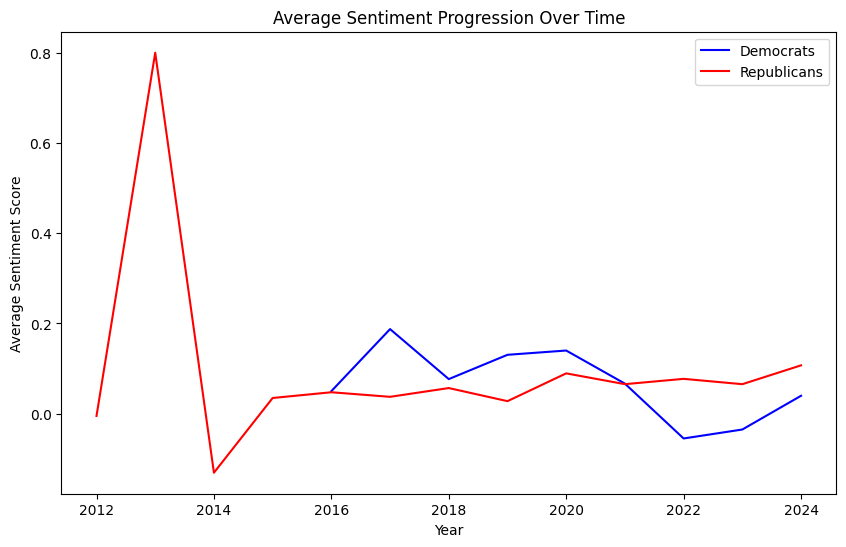

In [110]:
# Calculate average sentiment score per year for each party
yearly_sentiment = posts_df.groupby(['Year', 'Party'])['Sentiment_Score'].mean().unstack()

# Plot sentiment over time for Democrats and Republicans
plt.figure(figsize=(10, 6))
plt.plot(yearly_sentiment.index, yearly_sentiment['Democrats'], label='Democrats', color='blue')
plt.plot(yearly_sentiment.index, yearly_sentiment['Republicans'], label='Republicans', color='red')
plt.title("Average Sentiment Progression Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare features (e.g., sentiment scores) and labels (party)
X = posts_df[['Sentiment_Score']]  # Adjust with other features if available
y = posts_df['Party'].apply(lambda x: 1 if x == 'Democrats' else 0)  # 1 for Democrats, 0 for Republicans

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate overall predicted sentiment distribution
predicted_party = 'Democrats' if y_pred.sum() > len(y_pred) / 2 else 'Republicans'
print(f"Predicted Winning Party: {predicted_party}")

Model Accuracy: 0.7979094076655052
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       228
           1       0.57      0.07      0.12        59

    accuracy                           0.80       287
   macro avg       0.69      0.53      0.50       287
weighted avg       0.76      0.80      0.73       287

Predicted Winning Party: Republicans
